# Preprocessing and Filtering

This notebook demonstrates data cleaning and filtering techniques:
- Removing artifacts
- Smoothing noisy data
- Handling missing values
- Rate limiting and outlier removal

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

import pypipr

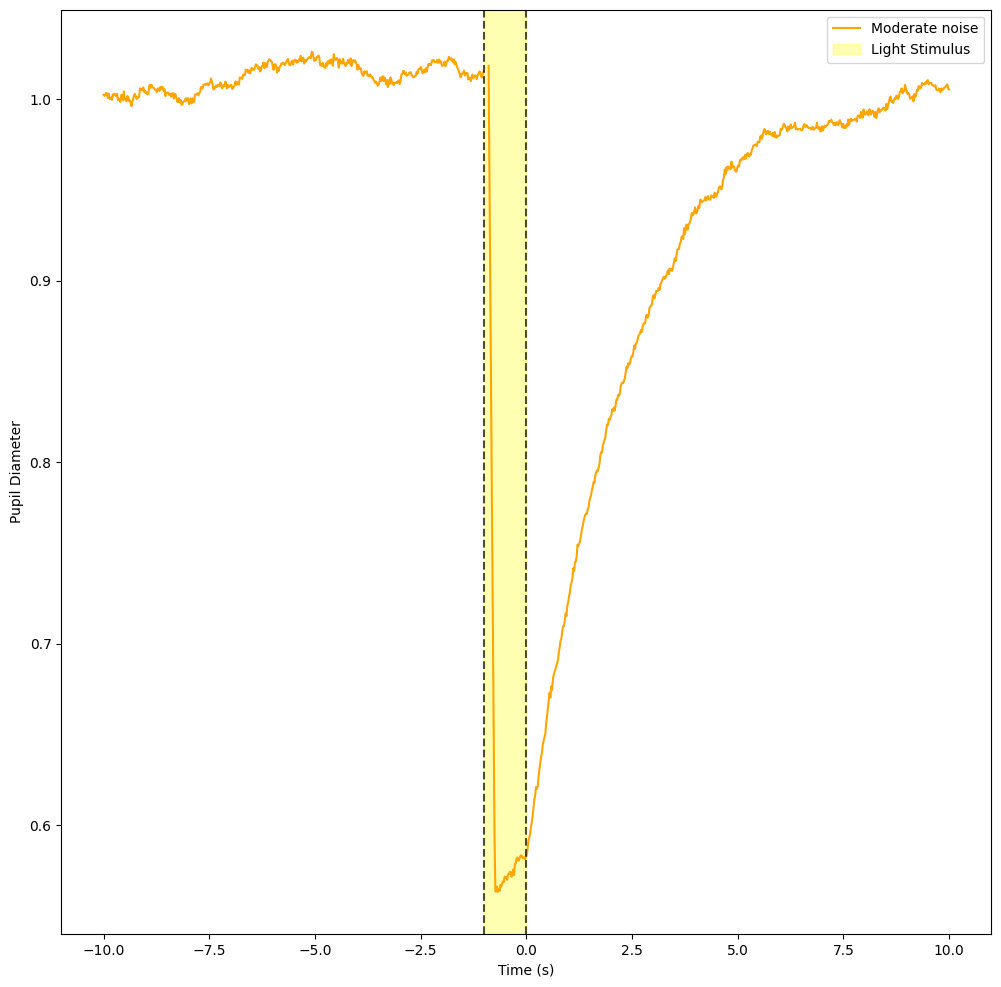

In [8]:
np.random.seed(0)
# Create simulated data with noise (Example 1)
noisy_signal = pypipr.simulate_pupil_measurement(noise_std=0.001, trend_std=0.001)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
noisy_signal.plot(ax=ax, color="orange", linewidth=1.5, label="Moderate noise")
noisy_signal.plot_light_stimulus(ax=ax, color="yellow", alpha=0.3)
ax.legend()

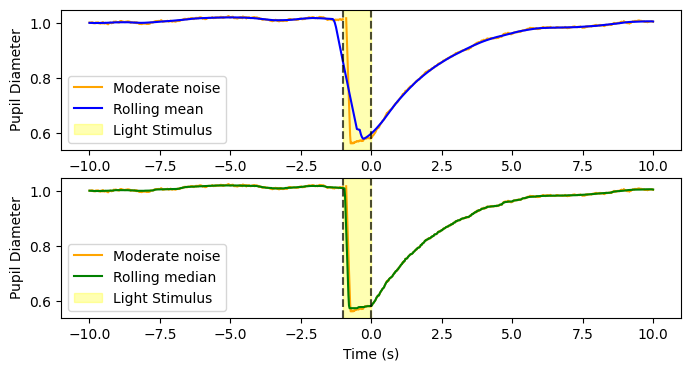

In [9]:
# Let's apply a few filters to the noisy signal

# Rolling mean
rolling_mean_signal = noisy_signal.copy()
rolling_mean_signal.rolling_mean(time_window=1)

# Rolling median
rolling_median_signal = noisy_signal.copy()
rolling_median_signal.rolling_median(time_window=1)

fig, ax = plt.subplots(2, 1, figsize=(8, 4))
noisy_signal.plot(ax=ax[0], color="orange", linewidth=1.5, label="Moderate noise")
rolling_mean_signal.plot(ax=ax[0], color="blue", linewidth=1.5, label="Rolling mean")
noisy_signal.plot(ax=ax[1], color="orange", linewidth=1.5, label="Moderate noise")
rolling_median_signal.plot(ax=ax[1], color="green", linewidth=1.5, label="Rolling median")

noisy_signal.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
noisy_signal.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)
ax[0].legend()
ax[1].legend()

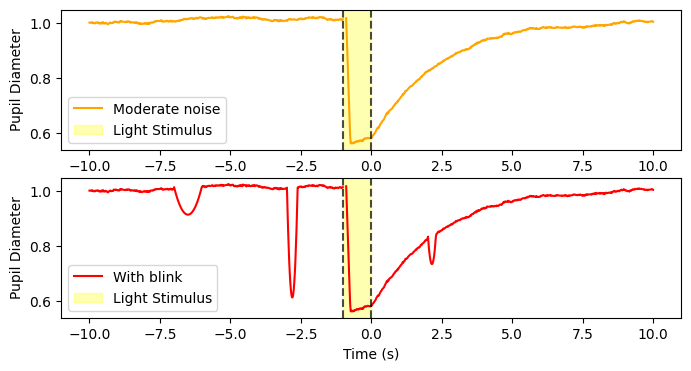

In [10]:
# Now let's add two blinks to the noisy data.
blink_signal =  noisy_signal.copy()
blink_size = blink_signal.get_size()

# Create a blink by replacing part of the signal with a quadratic function
size_during_blink_1 = (
    np.square(np.linspace(-1, 1, 50)) / 10 + np.mean(blink_size[150:200]) - 0.1
)
blink_size[150:200] = size_during_blink_1
size_during_blink_2 = (
    np.square(np.linspace(-2, 2, 20)) / 10 + np.mean(blink_size[350:370]) - 0.4
)
blink_size[350:370] = size_during_blink_2
size_during_blink_3 = (
    np.square(np.linspace(-1, 1, 15)) / 10 + np.mean(blink_size[600:615]) - 0.1
)
blink_size[600:615] = size_during_blink_3
blink_signal.set_time_and_size(blink_signal.get_time(), blink_size)

# Plot blink comparison
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
noisy_signal.plot(ax=ax[0], color="orange", linewidth=1.5, label="Moderate noise")
blink_signal.plot(ax=ax[1], color="red", linewidth=1.5, label="With blink")

noisy_signal.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
blink_signal.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)
ax[0].legend()
ax[1].legend()

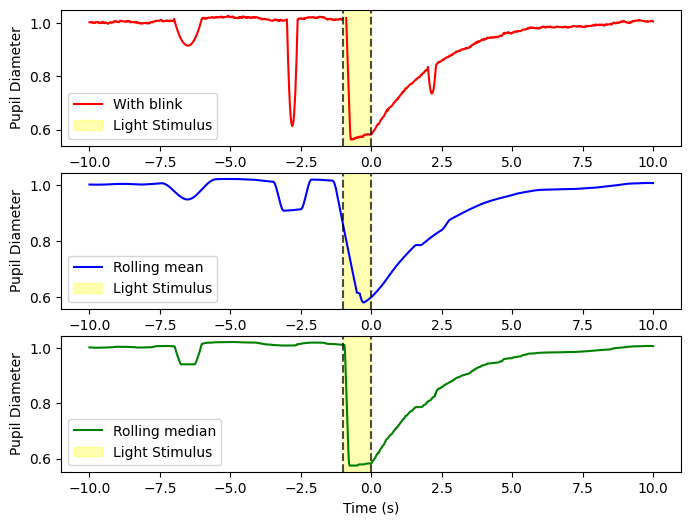

In [11]:
# Now we can try to filter the blinks using the mean and median filters again
blink_rolling_mean_signal = blink_signal.copy()
blink_rolling_mean_signal.rolling_mean(time_window=1)
blink_rolling_median_signal = blink_signal.copy()
blink_rolling_median_signal.rolling_median(time_window=1)

fig, ax = plt.subplots(3, 1, figsize=(8, 6))
blink_signal.plot(ax=ax[0], color="red", linewidth=1.5, label="With blink")
blink_rolling_mean_signal.plot(ax=ax[1], color="blue", linewidth=1.5, label="Rolling mean")
blink_rolling_median_signal.plot(ax=ax[2], color="green", linewidth=1.5, label="Rolling median")

blink_signal.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
blink_rolling_mean_signal.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)
blink_rolling_median_signal.plot_light_stimulus(ax=ax[2], color="yellow", alpha=0.3)

ax[0].legend()
ax[1].legend()
ax[2].legend()

Blink 1: Start at -7.0 s, end at -6.0 s
Blink 2: Start at -3.0 s, end at -2.6 s
Blink 3: Start at 2.0 s, end at 2.3 s


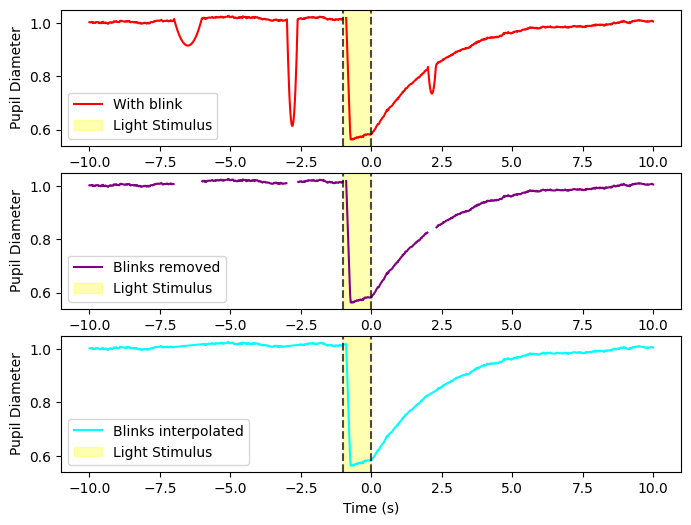

In [12]:
# If filtering is not sufficient, we can also remove the blinks.
blink_removed_signal = blink_signal.copy()
time = blink_signal.get_time().copy()
print(f"Blink 1: Start at {time[150]:.1f} s, end at {time[200]:.1f} s")
print(f"Blink 2: Start at {time[350]:.1f} s, end at {time[370]:.1f} s")
print(f"Blink 3: Start at {time[600]:.1f} s, end at {time[615]:.1f} s")
blink_list = [(-7, -6), (-3, -2.6), (2, 2.3)]

blink_removed_signal.set_blinks(blink_list)
blink_removed_signal.remove_blinks()


interpolated_blinks_signal = blink_removed_signal.copy()
interpolated_blinks_signal.drop_nan()
time = blink_signal.get_time().copy()
interpolated_blinks_signal.interpolate(time)

fig, ax = plt.subplots(3, 1, figsize=(8, 6))
blink_signal.plot(ax=ax[0], color="red", linewidth=1.5, label="With blink")
blink_removed_signal.plot(ax=ax[1], color="purple", linewidth=1.5, label="Blinks removed")
interpolated_blinks_signal.plot(ax=ax[2], color="cyan", linewidth=1.5, label="Blinks interpolated")

blink_signal.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
blink_removed_signal.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)
interpolated_blinks_signal.plot_light_stimulus(ax=ax[2], color="yellow", alpha=0.3)
ax[0].legend()
ax[1].legend()
ax[2].legend()

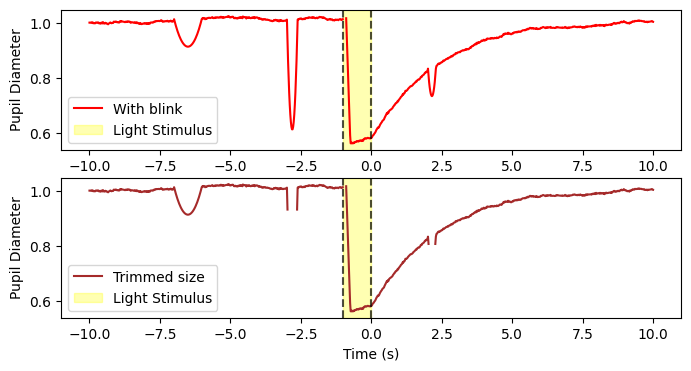

In [13]:
# Another way to remove blinks or other outliers is by trimming the size.
trimmed_signal = blink_signal.copy()

# Removing the second blink
trimmed_signal.trim_size(min_size=0.9, max_size=1.2, start_time=-10, end_time=-1.5)
# Removing the third blink
trimmed_signal.trim_size(min_size=0.8, max_size=1.0, start_time=2.0, end_time=3.0)

fig, ax = plt.subplots(2, 1, figsize=(8, 4))
blink_signal.plot(ax=ax[0], color="red", linewidth=1.5, label="With blink")
trimmed_signal.plot(ax=ax[1], color="brown", linewidth=1.5, label="Trimmed size")

blink_signal.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
trimmed_signal.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)
ax[0].legend()
ax[1].legend()

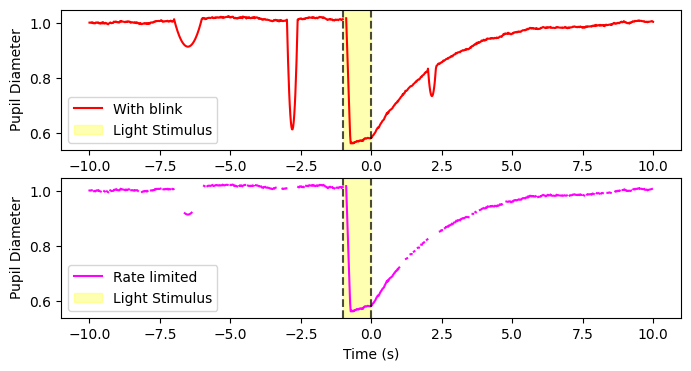

In [15]:
# Finally, we can remove blinks by limiting the rate of change.
rate_limited_signal = blink_signal.copy()
# We don't limit the rate of change between -1 s and 0 s to preserve the constriction response to the light stimulus.
rate_limited_signal.limit_rate_of_change(
    max_rate_of_change=0.1, start_time=-10, end_time=-1
)
rate_limited_signal.limit_rate_of_change(
    max_rate_of_change=0.1, start_time=1, end_time=10
)

fig, ax = plt.subplots(2, 1, figsize=(8, 4))
blink_signal.plot(ax=ax[0], color="red", linewidth=1.5, label="With blink")
rate_limited_signal.plot(ax=ax[1], color="magenta", linewidth=1.5, label="Rate limited")
blink_signal.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
rate_limited_signal.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)
ax[0].legend()
ax[1].legend()